# Business Problem

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df  = pd.read_csv('student_info.csv')

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


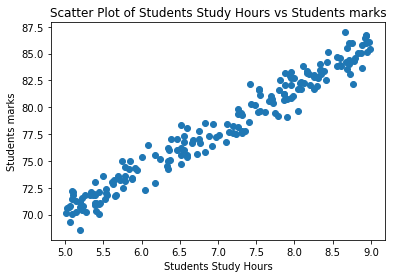

In [8]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

## Prepare the data for Machine Learning algorithms 

### Data Cleaning

In [9]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [11]:
df1 = df.fillna(df.mean())

In [12]:
df1.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [13]:
df1.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


### Split Dataset

In [14]:
x = df1.drop("student_marks", axis = "columns")
y = df1.drop("study_hours", axis = "columns")
print("shape of X = ", x.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=10)
print("shape of X_train = ", x_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", x_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


### Select a model and train it

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
lr.coef_

array([[3.9224074]])

In [21]:
lr.intercept_

array([50.50226651])

In [24]:
lr.predict([[4]])[0][0].round(2)

66.19

In [26]:
y_pred  = lr.predict(x_test)
y_pred

array([[72.66386831],
       [80.11644237],
       [79.60652941],
       [76.39015534],
       [84.66643495],
       [80.58713126],
       [81.05782014],
       [84.5879868 ],
       [82.86212755],
       [77.94322752],
       [85.33324421],
       [76.35093127],
       [74.1936072 ],
       [81.13626829],
       [84.5879868 ],
       [80.78325163],
       [70.19275165],
       [70.46732017],
       [75.48800164],
       [82.07764607],
       [77.68454978],
       [72.62464424],
       [78.97894422],
       [82.07764607],
       [82.90135162],
       [83.09747199],
       [82.50911088],
       [76.23325904],
       [70.15352758],
       [79.33196089],
       [81.33238866],
       [81.41083681],
       [70.54576832],
       [82.66600718],
       [78.35135904],
       [83.5289368 ],
       [78.50825533],
       [83.25436829],
       [77.99834237],
       [71.64404239]])

In [27]:
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.650000,71.70,72.663868
1,7.550000,81.18,80.116442
2,7.420000,82.18,79.606529
3,6.600000,78.05,76.390155
4,8.710000,84.44,84.666435
5,7.670000,80.58,80.587131
6,7.790000,79.17,81.057820
7,8.690000,85.48,84.587987
8,8.250000,82.79,82.862128
9,6.995949,78.68,77.943228


## Fine-tune your model

In [28]:
lr.score(x_test,y_test)

0.9356758478249172

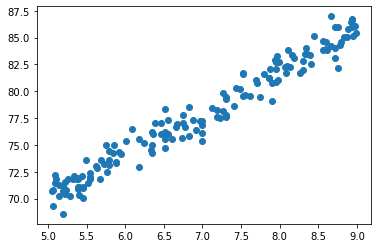

In [30]:
plt.scatter(x_train,y_train)

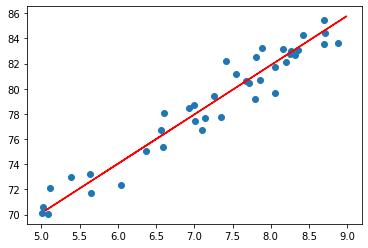

In [31]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = "r")

## Present your solution

## Save Ml Model

In [32]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [33]:
model = joblib.load("student_mark_predictor.pkl")